In [1]:
### This script simulates N-strain dynamics in the coinfection model (le TMT et al. 2021) when there is variation 
### in coinfection clearance rates and transmission probability from coinfected hosts between similar strains. 
###Below, we simulate the replicator dynamics derived for this model on the slow time scale \epsilon t.

import numpy as np
from scipy import integrate
import scipy.integrate  as  ode
import matplotlib.pyplot  as  plt

np.set_printoptions(linewidth = 130, precision = 13)
%matplotlib inline

In [2]:
def repli(r): #solve the solution for replicator
    #parameters
    m = gamma + r #r: mortality as well as recruitment ratios
    beta = m*R0
    
    #computation the variables of neutral system
    S_star = m/beta
    T_star = 1 - S_star
    I_star = m*T_star/(m + beta*k*T_star)
    J_star = T_star - I_star
    detP = -I_star*J_star + 2*(T_star)**2
    
    teth3 = gamma*T_star*J_star/detP
    teth4 = 2*m*T_star*J_star/detP

    lamd = np.zeros((n,n)) #n: number of strains
    for i in range (0, n):
        for j in range (0, n): #pairwise invasion fitness
            lamd[i][j] =  teth3*(-nu2d[i][j] - nu2d[j][i] + 2*nu2d[j][j])  + teth4*(omega[i,j] - omega[j,i])
        #replicator system
    def du_dt(u, t = 0):
        return u*(np.dot(lamd,u) - np.dot(np.dot(lamd,u),u))
        
    u, infodict = integrate.odeint(du_dt, u0, t, full_output = True)
    infodict['message']
    s = []
    for i in range(0, n):
        s.append(u.T[i])
    return s

In [3]:
### We define the parameter of the neutral model
n = 10
u0 = np.array([0.15, 0.08, 0.15, 0.18, 0.09, 0.08, 0.12, 0.05, 0.05, 0.05])
k = 3
R0 = 2
gamma = 1
### Set the perturbations values for coinfection clearance rates and transmission probability from co-colonized hosts
nu2d = np.array([
 [-0.8, -4.2, -2.3, -1.9, -2.3, -2.1,  3.6,  1.8, -3.1,  1.9],
 [-0.4,  0.3,  4.5, -0.8, -0.4,  0.9, -4.6,  0.9, -1.2, -4.6],
 [ 2.1,  1.9, -4.7,  3.3,  2.3,  3. ,  1.8, -4.7, -2.8,  0.2],
 [ 3.5, -1.6, -1.4,  2.6, -1.1,  2.6, -3.9,  3.9,  1.5, -3.4],
 [-4.6,  1.7,  2.2, -1.4, -3.5,  2. ,  2.5, -5. , -3.6,  1.9],
 [ 0.6,  0.3,  2.9, -4.8,  0.3,  2. ,  3.7, -4.1, -4.9,  3. ],
 [ 1.1,  0.8, -0.2, -3.8, -4.4,  2.4, -0.9, -1.4,  0.6,  1.8],
 [ 0.4,  3.7, -0.8,  4.9,  2.3, -3.8,  1.2,  1.6, -1. ,  3.3],
 [ 4.6,  0.7, -4.3,  2. ,  4. , -0.4,  0.3,  1.5,  3.3, -2.6],
 [ 3.4, -4.9, -3.3, -4.3, -2.1,  2.3, -0.2, -4.4, -3. ,  2.3]])

omega = np.array([
 [-4.8,  0.4,  4.1,  4.6, -1.8,  4.1, -3.8, -2.2, -5.2,  1.4],
 [-1.4,  0.8, -2.4,  3.1, -2.7, -0.8, -5.2, -4.6, -1.4, -2.8],
 [ 5.1, -3.3,  1.8,  0.1, -4.7,  5.5, -3.7,  3.9,  5.4,  1.1],
 [-4.1, -1.8,  1.7, -2.8, -5.5, -0.9, -2.2, -5.6,  5.8,  5.2],
 [-3.3,  5.6,  4.5, -0.3,  1.8,  3.1,  3.7,  4.1,  4.7,  0.5],
 [ 4.5,  0.5,  3.4, -4.2, -2.6, -3.2,  5.4,  2.3,  5. ,  5. ],
 [ 3. , -5.4,  5.1, -3.3,  2.4, -5.6,  3.2,  3.2,  0.3, -5.9],
 [ 2.6,  1.8, -5.1,  5.2, -0.8, -4.4,  5.6, -4.4, -5.3,  0.4],
 [ 2.4, -5.5, -2.2, -4.7, -3.4,  1.5, -1.5,  2.8,  6. ,  1.3],
 [ 4. , -4.9, -0.2, -4.7, -6. , -0.3,  1.8,  2.9, -5.4,  0.9]])

t = np.linspace(0, 50, 500)

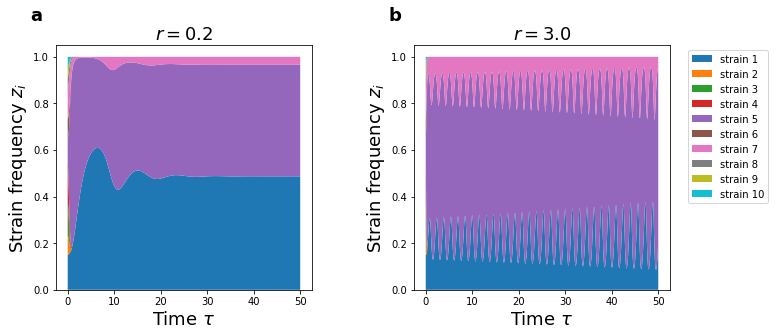

In [4]:
r =np.array([0.2, 3]) #values of mortality

labels = []
for i in range(0,n):
    labels.append('strain {}'.format(i+1))
    
order = np.array(('a', 'b'))

fig, ax = plt.subplots(1, 2, figsize = (11,4.5))
fig.subplots_adjust(wspace = 0.4)

for i in range (0, 2):
    s = repli(r[i])
    ax[i].stackplot(t, s, labels = labels)
    ax[i].set_xlabel("Time $\\tau$", fontsize = 18)
    ax[i].set_ylabel("Strain frequency $z_i$", fontsize = 18)
    ax[i].set_title('$r = {}$'.format(r[i]), fontsize = 18)
    ax[i].text(-0.1, 1.1, '{}'.format(order[i]), transform=ax[i].transAxes, size=18, weight='bold')

ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')